In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Data

We will split the existing 113_data in such a way, that each conversation gets its own file.
Each conversation will include the CDS results of each message alongside the information from message_info file.

Postchat questions and prechat questions can stay in the same files.

In [6]:
def split_data():
    # Write each conversation from 113_data into a seperate file.
    # The conversation itself isn't altered in any way.
    data_path = "./113_data/"
    target_path = "./conversations/"

    years = range(2017,2022)

    cds_results = "CDS_results.tsv"
    message_info = "message_info.tsv"

    for y in years:
        fpath = os.path.join(data_path, str(y))

        print("On year " + str(y))

        # All sub directories in a year folder
        dirs =  os.listdir(fpath)
        for d in dirs:
            print("In directory: " + d)

            cpath = os.path.join(fpath, d)
            
            # Path to the two files
            cds_r = os.path.join(cpath, cds_results)
            msg_i = os.path.join(cpath, message_info)

            cds_df = pd.read_csv(cds_r, sep='\t')
            msg_df = pd.read_csv(msg_i, sep='\t')

            split_conversations(cds_df, msg_df, target_path, d)



def split_conversations(cds_df, msg_df, target_path, conv_dir_name):
    # Looks at cds_df and msg_df, extracts each conversation out
    # and writes them to target path  to file conv_dir_name_event_id.tsv
    #print("Length of cds is: " + str(cds_df.index))

    while len(cds_df.index)>0:
        # We get first row, look at event_id and extract all rows in cds_df and msg_df with that event_id.
        r = cds_df.iloc[0]
        eid = r['event_id']

        cds_eid_data = cds_df.loc[cds_df['event_id'] == eid]
        msg_eid_data = msg_df[msg_df['event_id'] == eid]

        # We drop in msg_eid event_id and message_id column (we don't need 2)
        msg_eid_data = msg_eid_data.drop(['event_id'], axis=1)
        msg_eid_data = msg_eid_data.drop(['message_id'], axis=1)

        # We combine cds and msg data and write to file
        merged = pd.concat([cds_eid_data, msg_eid_data], axis=1)
        merged.to_csv(os.path.join(target_path, conv_dir_name+"_"+eid+".csv"), sep='\t')
        
        # Then we drop the selected rows from both df
        cds_df.drop(cds_eid_data.index, axis=0, inplace=True)
        msg_df.drop(msg_eid_data.index, axis=0, inplace=True)

        #print("Left: " + str(len(cds_df.index)))

    return 0

split_data()

On year 2017
In directory: 201711
In directory: 201710
In directory: 201708
In directory: 201712
In directory: 201709
In directory: 201707
On year 2018
In directory: 201808
In directory: 201812
In directory: 201806
In directory: 201805
In directory: 201804
In directory: 201807
In directory: 201811
In directory: 201810
In directory: 201809
In directory: 201801
In directory: 201803
In directory: 201802
On year 2019
In directory: 201901
In directory: 201909
In directory: 201911
In directory: 201906
In directory: 201904
In directory: 201907
In directory: 201908
In directory: 201903
In directory: 201910
In directory: 201902
In directory: 201905
In directory: 201912
On year 2020
In directory: 202010
In directory: 202008
In directory: 202006
In directory: 202011
In directory: 202012
In directory: 202009
In directory: 202007
In directory: 202003
In directory: 202002
In directory: 202004
In directory: 202005
In directory: 202001
On year 2021
In directory: 202101
In directory: 202103
In director

In [7]:
def validate_data_split():
    # Count length of the conversations

    data_path = "./113_data/"
    target_path = "./conversations/"

    years = range(2017,2022)

    cds_results = "CDS_results.tsv"
    message_info = "message_info.tsv"

    data_length = 0

    for y in years:
        fpath = os.path.join(data_path, str(y))

        # All sub directories in a year folder
        dirs =  os.listdir(fpath)
        for d in dirs:
            cpath = os.path.join(fpath, d)
            # Path to the two files
            cds_r = os.path.join(cpath, cds_results)

            cds_df = pd.read_csv(cds_r, sep='\t')
            data_length = data_length + len(cds_df.index)
    
    conv_length = 0
    for c in os.listdir(target_path):
        conv_df = pd.read_csv(os.path.join(target_path, c), sep='\t')
        conv_length = conv_length + len(conv_df.index)

    return (data_length, conv_length)


# Prechat questions and Postchat categories rated from (1-7)
## Categories
I tend to kill myself
I can't take my pain anymore
I am capable of killing myself
I am a burden to others
I feel like I'm stuck
Ik heb de wil om te leven
I'm hopeless
I don't belong anywhere
I feel like I've given up



In [12]:
def filter_conversations():
    # Leave only client messages in conversations

    data_path = "./conversations"
    target_path = "./filtered_conv/"

    for c in os.listdir(data_path):
        conv_df = pd.read_csv(os.path.join(data_path, c), sep='\t')
        df = conv_df[conv_df['user_handle'] == 'client']
        df.to_csv(os.path.join(target_path, c+".csv"), sep='\t')
filter_conversations()

# Ploting client conversation data
Plot the number of CDS's in a conversation

/tmp/ipykernel_31448/577799523.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('event_id', 1)
/tmp/ipykernel_31448/577799523.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('message_id', 1)
/tmp/ipykernel_31448/577799523.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('user_handle', 1)
/tmp/ipykernel_31448/577799523.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('sec_since_start',1)
/tmp/ipykernel_31448/577799523.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 0',

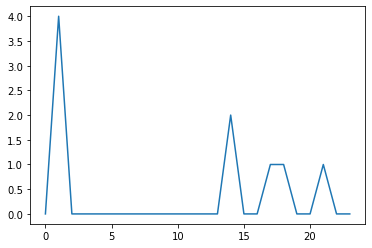

In [54]:
def plot_client_conv(i):
    path = "./filtered_conv/"
    files = os.listdir(path)

    df = pd.read_csv(os.path.join(path, files[i]), sep='\t')
    df = df.drop('event_id', 1)
    df = df.drop('message_id', 1)
    df = df.drop('user_handle', 1)
    df = df.drop('sec_since_start',1)
    df = df.drop('Unnamed: 0',1)
    df = df.drop('Unnamed: 0.1',1)

    df['num_of_cds'] = df.sum(axis=1)

    gfg = pd.Series(df['num_of_cds'])
        
    gfg.plot()
    plt.show()

plot_client_conv(2550)

In [66]:
def rename():
    files = os.listdir("./filtered_conv")
    for f in files:
        if "questions" in f:
            continue
        orig = str(f)
        ind = f.index("_")
        f = f[ind+1:]
        f = f[:-4]
        os.rename(os.path.join("./filtered_conv",orig), os.path.join("./filtered_conv", f))